In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Reading in the dataset and dropping the last coloumn with all zero entires

dataset = pd.read_csv("Features_Variant_1.csv",header=None)
dataset = dataset.drop(37,1)
print("Total number of samples in the dataset is {}".format(dataset.shape[0]))
print("Number of attributes per sample is {}".format(dataset.shape[1]))

Total number of samples in the dataset is 40949
Number of attributes per sample is 53


In [3]:
#feature data frame: independent variables: all columns except last one
X = dataset.iloc[:, :-1].values 

#dependent variable (only the last column, -1: is the last column)
y = dataset.iloc[:, -1].values 

In [4]:
# Splitting the data into three dataset
# Set A - Training set - 80% Test set - 20%
# Set B - Training set - 50% Test set - 50%
# Set C - Training set - 20% Test set - 80%

XAtrain,XAtest,yAtrain,yAtest = train_test_split(X,y,test_size=0.2,random_state=123456)
XBtrain,XBtest,yBtrain,yBtest = train_test_split(X,y,test_size=0.5,random_state=123456)
XCtrain,XCtest,yCtrain,yCtest = train_test_split(X,y,test_size=0.8,random_state=123456)


In [5]:
# Input : dataset (X,y)
# Output: weight vector that minimizes the minimum SSE function computed using the closed form solution.

def solveWeights_version1(X,y):
    
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

In [6]:
# Input : X and w
# Output: predicted targets hw(x) = yHat using the weight vector and data X

def predict(X,w):
    yHat = X.dot(w)
    return yHat

In [7]:
# Calculating the Sum Squared Error

def computeSSE(y,yHat):
    SSE = (y-yHat).T.dot(y-yHat)
    return SSE

In [8]:
# SET A
# Add the 1's column in the Xtrain and Xtest to add bias as a training feature

XAtrain = np.c_[np.ones((XAtrain.shape[0])),XAtrain]
XAtest = np.c_[np.ones((XAtest.shape[0])),XAtest]
wA = solveWeights_version1(XAtrain,yAtrain)
# wA.shape
yHatA = predict(XAtest,wA)
# yHatA.shape

In [9]:
# Sum Squared Error for SET A

SSE_A = computeSSE(yAtest,yHatA)
print("SSE using closed form solution {:.4f} [SET A]".format(SSE_A))

SSE using closed form solution 162450949911.5593 [SET A]


In [10]:
# SET B

XBtrain = np.c_[np.ones((XBtrain.shape[0])),XBtrain]
XBtest = np.c_[np.ones((XBtest.shape[0])),XBtest]
wB = solveWeights_version1(XBtrain,yBtrain)
# wB.shape
yHatB = predict(XBtest,wB)
# yHatB.shape

In [11]:
# Sum Squared Error for SET B

SSE_B = computeSSE(yBtest,yHatB)
print("SSE using closed form solution {:.4f} [SET B]".format(SSE_B))

SSE using closed form solution 146602789054.2857 [SET B]


In [12]:
# SET C


XCtrain = np.c_[np.ones((XCtrain.shape[0])),XCtrain]
XCtest = np.c_[np.ones((XCtest.shape[0])),XCtest]

wC = solveWeights_version1(XCtrain,yCtrain)
# wC.shape
yHatC = predict(XCtest,wC)
# yHatC.shape

In [13]:
SSE_C = computeSSE(yCtest,yHatC)
print("SSE using closed form solution {:.4f} [C set]".format(SSE_C))

SSE using closed form solution 2604317752767.0439 [C set]


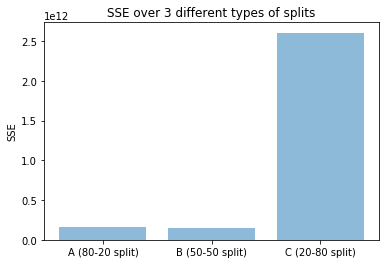

In [14]:
# Plotting the SSE at for each of the three sets of data
 
objects = ('A (80-20 split)', 'B (50-50 split)', 'C (20-80 split)')
y_pos = np.arange(len(objects))
performance = [SSE_A,SSE_B,SSE_C]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('SSE')
plt.title('SSE over 3 different types of splits')
 
plt.show()

In [15]:
# REGULARIZATION

def solveWeights_version2(X,y,lambdaVal):
    # Input dataset (X,y)
    # Output: weight vector that minimizes the minimum SSE function computed using the closed form solution
    #         (with l2 regularization on w)
    XtX = X.T.dot(X)
    I = np.eye(XtX.shape[0])
    w = inv(lambdaVal*I + XtX).dot(X.T).dot(y)
    return w

In [16]:
# Calculating the SSE after regualarization

def getSSE_fromExperiment(Xtrain,ytrain,Xtest,ytest,lambdaVal):
    #don't forget to add the 1 column in the Xtrain and Xtest
    Xtrain = np.c_[np.ones((Xtrain.shape[0])),Xtrain]
    Xtest = np.c_[np.ones((Xtest.shape[0])),Xtest]
    
    w = solveWeights_version2(Xtrain,ytrain,lambdaVal)
    
    yHat = predict(Xtest,w)
    SSE = computeSSE(ytest,yHat)
    
    return SSE

In [17]:
# Intializing regularization paramenter LAMBDA with different values

lambdaVals = [0.1,1,10,100]
SSEMatrix = np.zeros( (len(lambdaVals),3) )
for i in np.arange(0,4):
    l = lambdaVals[i]
    SSEMatrix[i,0] = getSSE_fromExperiment(XAtrain,yAtrain,XAtest,yAtest,l)
    SSEMatrix[i,1] = getSSE_fromExperiment(XBtrain,yBtrain,XBtest,yBtest,l)
    SSEMatrix[i,2] = getSSE_fromExperiment(XCtrain,yCtrain,XCtest,yCtest,l)

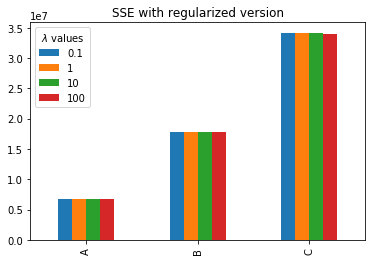

In [18]:
# Plotting the SSE values at each Lambda value for the three Sets A,B,C.

df = pd.DataFrame(SSEMatrix.T, index=['A', 'B', 'C'],columns=pd.Index(['{}'.format(lambdaVals[0]), '{}'.format(lambdaVals[1]), '{}'.format(lambdaVals[2]), '{}'.format(lambdaVals[3])], name='$\lambda$ values'))
df.plot(kind='bar',title='SSE with regularized version')
